Saving heart_cleaned.csv to heart_cleaned (4).csv
Saving model.pkl to model (3).pkl
Saving scaler.pkl to scaler (3).pkl
Dataset and model loaded successfully
SHAP values generated


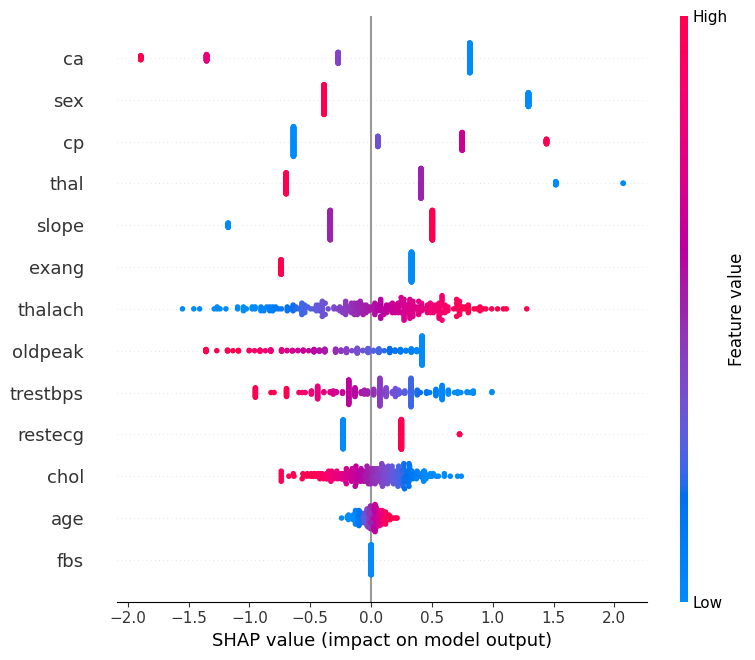

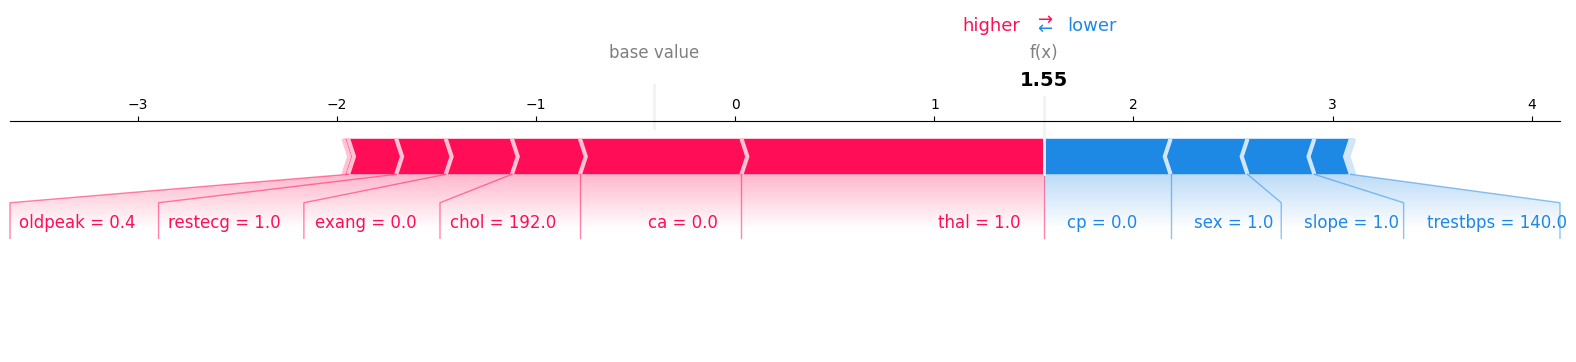

In [6]:
import pandas as pd
import pickle
import shap
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()


df = pd.read_csv("heart_cleaned.csv")

X = df.drop("target", axis=1)
y = df["target"]


model = pickle.load(open("model.pkl", "rb"))
scaler = pickle.load(open("scaler.pkl", "rb"))


X_scaled = scaler.transform(X)

print("Dataset and model loaded successfully")

explainer = shap.LinearExplainer(model, X_scaled)

shap_values = explainer.shap_values(X_scaled)

print("SHAP values generated")
shap.summary_plot(shap_values, X, feature_names=X.columns)

sample_index = 5

shap.force_plot(
    explainer.expected_value,
    shap_values[sample_index],
    X.iloc[sample_index],
    matplotlib=True
)


